In [1]:
import xarray as xr
from pcv.process import standardise_monthly, detrend, aggregate_seasons, select_data
import matplotlib.pylab as plt

In [2]:

temp_path = "/Users/anand/Documents/data/project_3_data/t2m.monthly.era5.europe.1981-2020.nc"
tp_path = "/Users/anand/Documents/data/project_3_data/tp.monthly.era5.europe.1981-2020.nc"
rad_path = "/Users/anand/Documents/data/project_3_data/ssrd.monthly.era5.europe.1981-2020.nc"
lai_path = "/Users/anand/Documents/data/project_3_data/GLOBMAP_LAI.monthly.1982-2020_europe_025deg.nc"
swvlall_path = "/Users/anand/Documents/data/project_3_data/swvlall.monthly.era5.europe.1981-2020.nc"
vpd_path = "/Users/anand/Documents/data/project_3_data/vpd_cf.monthly.era5.europe.1981-2020.nc"

temp_data = xr.open_dataset(temp_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(rad_path)
swvlall_data = xr.open_dataset(swvlall_path)
lai_data = xr.open_dataset(lai_path)
vpd_data = xr.open_dataset(vpd_path)


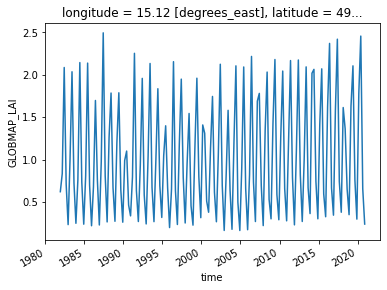

In [3]:
aggregated_temp = aggregate_seasons(temp_data)
aggregated_tp = aggregate_seasons(tp_data)
aggregated_ssrd = aggregate_seasons(ssrd_data)
aggregated_swvlall = aggregate_seasons(swvlall_data)
aggregated_lai = aggregate_seasons(lai_data)
aggregated_vpd = aggregate_seasons(vpd_data)


aggregated_lai["GLOBMAP_LAI"][:, 100, 100].plot()

Function detrend Took 0.3189 seconds
Function detrend Took 0.2637 seconds
Function detrend Took 0.2803 seconds
Function detrend Took 0.4528 seconds
Function detrend Took 0.6999 seconds
Function detrend Took 0.3416 seconds


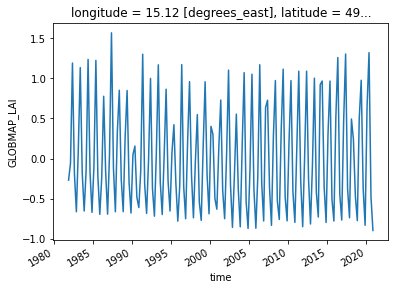

In [5]:
detrended_temp = detrend(aggregated_temp, deg=1, var="t2m")
detrended_tp = detrend(aggregated_tp, deg=1, var="tp")
detrended_ssrd = detrend(aggregated_ssrd, deg=1, var="ssrd")
detrended_swvlall = detrend(aggregated_swvlall, deg=1, var="swvlall")
detrended_lai = detrend(aggregated_lai, deg=1, var="GLOBMAP_LAI")
detrended_vpd = detrend(aggregated_vpd, deg=1, var="vpd_cf")

detrended_lai["GLOBMAP_LAI"][:, 100, 100].plot()

/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/

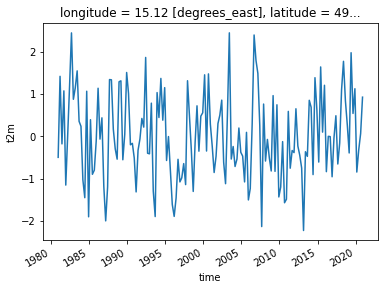

In [6]:

standardised_temp = standardise_monthly(detrended_temp)
standardised_tp = standardise_monthly(detrended_tp)
standardised_ssrd = standardise_monthly(detrended_ssrd)
standardised_swvlall = standardise_monthly(detrended_swvlall)
standardised_lai = standardise_monthly(detrended_lai)
standardised_vpd = standardise_monthly(detrended_vpd)

standardised_temp["t2m"][:, 100, 100].plot()

In [8]:
standardised_temp.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_temp.nc")
standardised_tp.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_tp.nc")
standardised_ssrd.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_ssrd.nc")
standardised_swvlall.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_swvlall.nc")
standardised_lai.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_lai.nc")
standardised_vpd.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_vpd.nc")